In [1]:
import numpy as np
import math
from typing import *
import matplotlib.pyplot as plt

# Zadanie 3
W zadaniu tym zajmiemy się omawianym na wykładzie ukrytym łańcuchem Markowa, <br>
na przykładzie nieuczciwego krupiera rzucającego kością. <br>
Przypominam zasady:
1. Krupier ma dwie kości, uczciwą i oszukaną.
2. Kość oszukana daje 6 oczek z $p=\frac{1}{2}$, a pozostałe wyniki z $p=\frac{1}{10}$
3. Krupier zmienia kość uczciwą na nieuczciwą z $p1 = 0.04$, a nieuczciwą na uczciwą z $p2 = 0.05$
4. Zaczynamy od uczciwej kości.
Napisz program, który dla danego ciągu rzutów (który musisz sam wygenerować) wypisuje ciąg stanów (u – kość uczciwa, n – kość nieuczciwa, długość rzędu 10000), <br>
w sposób maksymalizujący liczbę prawidłowo zgadniętych stanów. <br>
Rozwiąż to zadanie na dwa sposoby:
* Proponując heurystyczny algorytm decydujący na podstawie badania skupisk szóstek
* Implementując poprawny algorytm, bazujący na zmiennych α oraz β (zobacz wykład o HMM).

Wykonując eksperymenty, oszacuj poprawność działania obu algorytmów, mierzoną liczbą poprawnie zgadniętych stanów (podzieloną przez długość ciągu).

In [2]:
p0, p1 = 0.04, 0.05

loaded_6 = 0.5
loaded_rest = 0.1

In [3]:
def generate_sequence(
    N: int = 1000,
    p0: float = p0, p1: float = p1,
    loaded_6: float = loaded_6, loaded_rest: float = loaded_rest,
) -> np.ndarray:
    assert abs(loaded_6 + loaded_6 - 1) < 1e-9
    throws_sequence, which_dice = [], []
    act_dice = 0  # 0 - fair, 1 - loaded
    for i in range(N):
        which_dice.append(act_dice)
        r = np.random.rand()
        if act_dice == 0:
            dice_throw = np.random.choice([1, 2, 3, 4, 5, 6], p=[1 / 6] * 6)
            if r < p0:
                act_dice = 1
        else:
            dice_throw = np.random.choice([1, 2, 3, 4, 5, 6], p=[loaded_rest] * 5 + [loaded_6])
            if r < p1:
                act_dice = 0
        
        throws_sequence.append(dice_throw)
    return np.array(throws_sequence), np.array(which_dice)

In [16]:
def heuristic_model(
    sequence: np.ndarray, 
    possible_length: int = 3,
    close_gaps: int = 5
) -> np.ndarray:
    N = len(sequence)
    
    preds = np.array([0] * N)
    i = 0
    while i < N:
        if sequence[i] == 6:
            idx = i
            while idx < N and sequence[idx] == 6:
                idx += 1
     
            if idx - i > possible_length:
                preds[i: idx] = 1
                
            i = idx
        else:
            i += 1
    
    i = 0
    while i < N:
        if i + 1 < N and preds[i] == 1 and preds [i + 1] == 0:
            idx = i + 1
            while idx < N and preds[idx] == 0:
                idx += 1
                
            if idx - i <= close_gaps:
                preds[i: idx] = 1
                
            i = idx
        else:
            i += 1
            
    return preds

In [17]:
sequence, targets = generate_sequence()

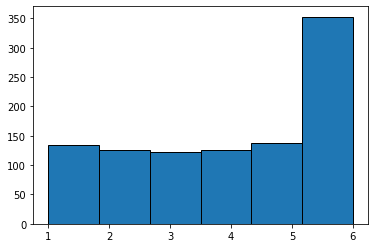

In [18]:
_ = plt.hist(sequence, bins=6, edgecolor='black')

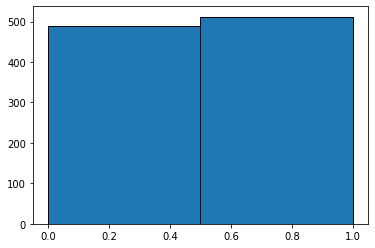

In [19]:
_ = plt.hist(targets, bins=2, edgecolor='black')

<BarContainer object of 1000 artists>

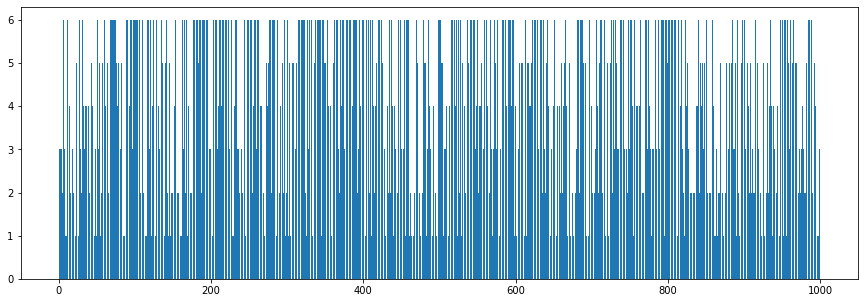

In [20]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence)

## Evaluate heuristic model

In [60]:
sequence, targets = generate_sequence()

In [65]:
preds = heuristic_model(
    sequence, 
    possible_length=1,
    close_gaps=10
)

In [66]:
print(f'Accuracy: {(preds == targets).mean() * 100 :.2f}%', )

Accuracy: 84.90%


Text(0.5, 1.0, 'Real')

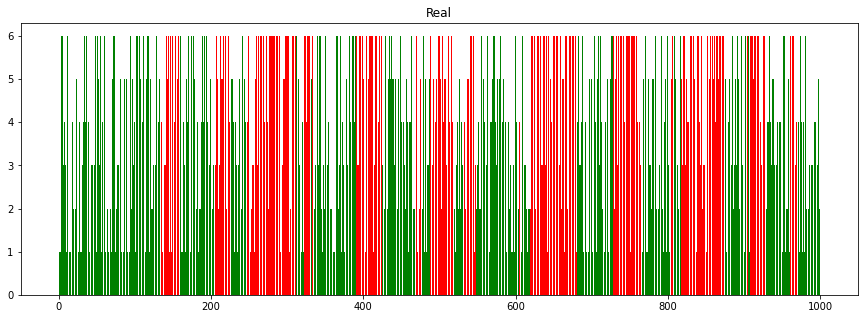

In [67]:
colors = np.array(['g', 'r'])[targets]
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence, color=colors)
plt.title('Real')

Text(0.5, 1.0, 'Predicted')

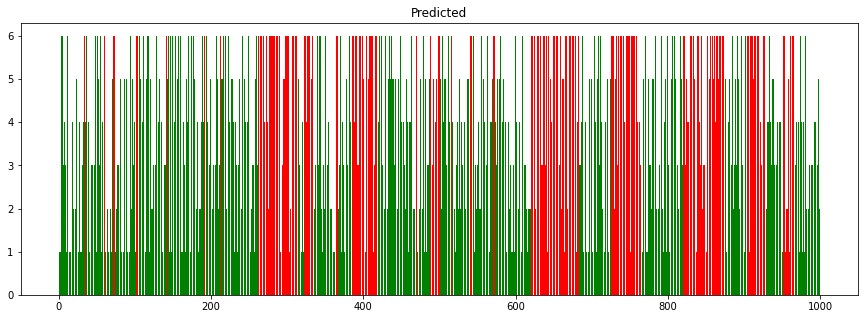

In [68]:
colors = np.array(['g', 'r'])[preds]
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence, color=colors)
plt.title('Predicted')

## Markov chains TODO

In [95]:
# 0 - fair dice
# 1 - loaded dice

A = [
    [(1 - p0), p0],
    [p1, (1 - p1)],
]

B = [
    [[1 / 6] * 6, [loaded_rest] * 5 + [loaded_6]],
    [[1 / 6] * 6, [loaded_rest] * 5 + [loaded_6]],
]

In [117]:
alpha = [[], []]
alpha[0].append(1)
alpha[1].append(0)

In [118]:
for i, v in enumerate(sequence):
    alpha0, alpha1 = 0, 0
    for j in range(2):
        alpha0 += alpha[j][i] * A[j][0] * B[j][0][v - 1]
        alpha1 += alpha[j][i] * A[j][1] * B[j][1][v - 1]
        
    alpha[0].append(np.log(alpha0))
    alpha[1].append(np.log(alpha1 + 1e-9))

TypeError: can't multiply sequence by non-int of type 'float'

In [116]:
alpha

[[1,
  -1.8325814574983104,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,